In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as smf

# Airlines+Data file 

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df.nunique()

Month         96
Passengers    80
dtype: int64

In [5]:
df.isna().sum()/len(df)*100

Month         0.0
Passengers    0.0
dtype: float64

In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


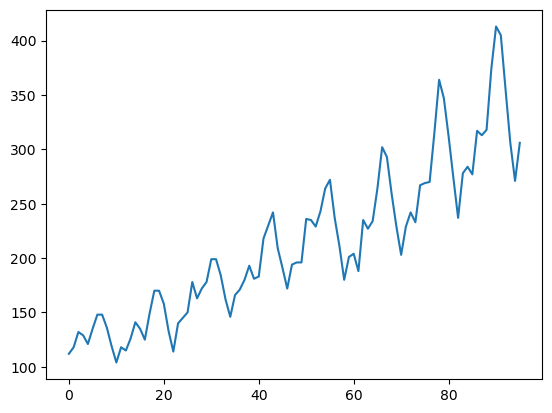

In [7]:
#Visualization 

plt.plot(df['Passengers'])
plt.show()

<Axes: >

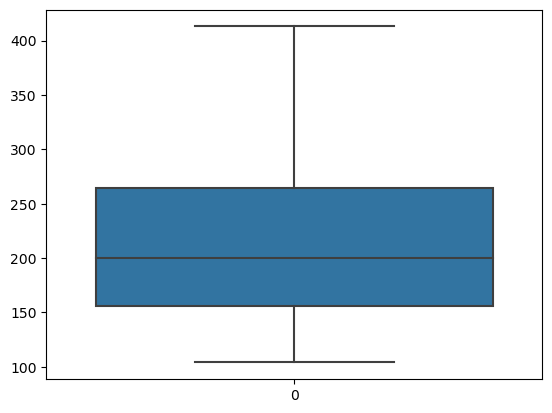

In [8]:
sns.boxplot(df['Passengers'])

In [9]:
df['Month'] = pd.to_datetime(df['Month'])
df['Months'] = df['Month'].dt.strftime('%b')
df.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [10]:
months_dummy = pd.DataFrame(pd.get_dummies(df['Months']))
df1 = pd.concat([df,months_dummy],axis = 1)
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
df1["Year"] = df1.Month.dt.strftime("%Y")

df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,1995


<Axes: xlabel='Months', ylabel='Year'>

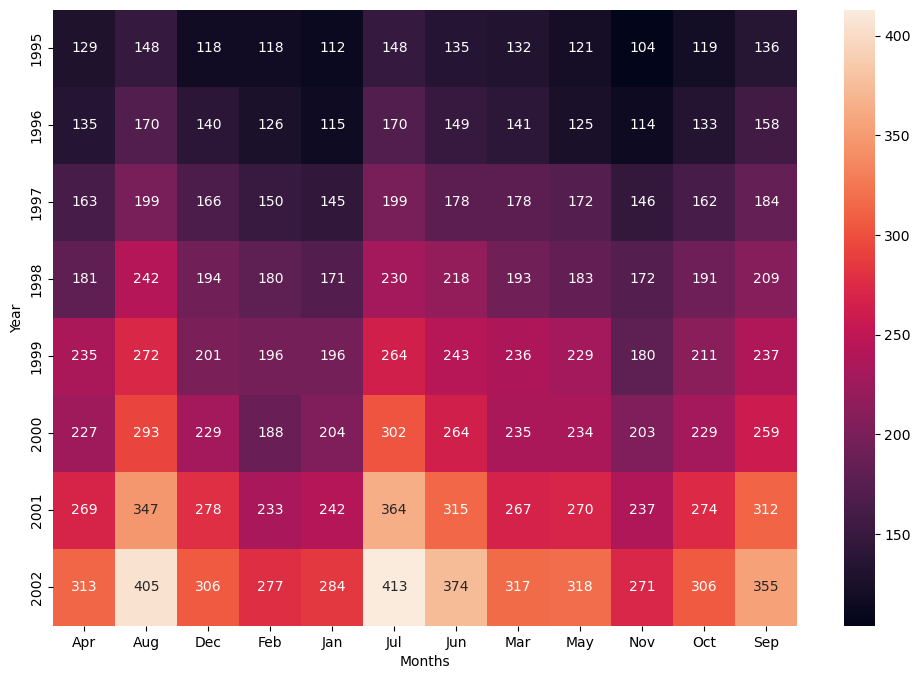

In [12]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df1,values="Passengers",index="Year",columns="Months",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Axes: xlabel='Year', ylabel='Passengers'>

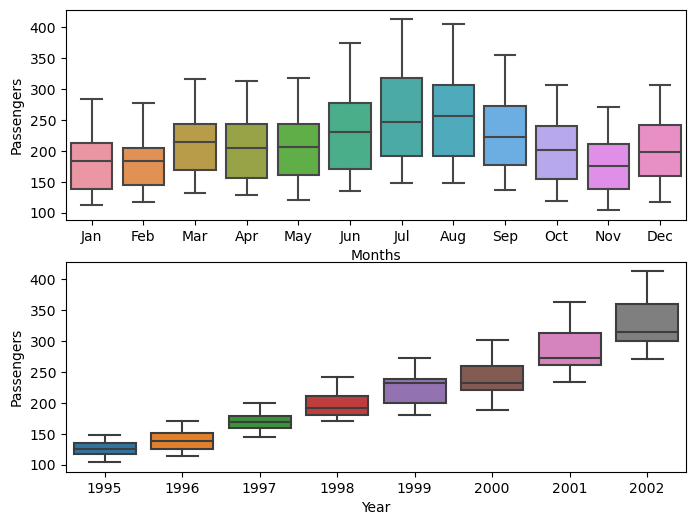

In [13]:
# Boxplot

plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Months",y="Passengers",data=df1)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=df1)

<Axes: xlabel='Year', ylabel='Passengers'>

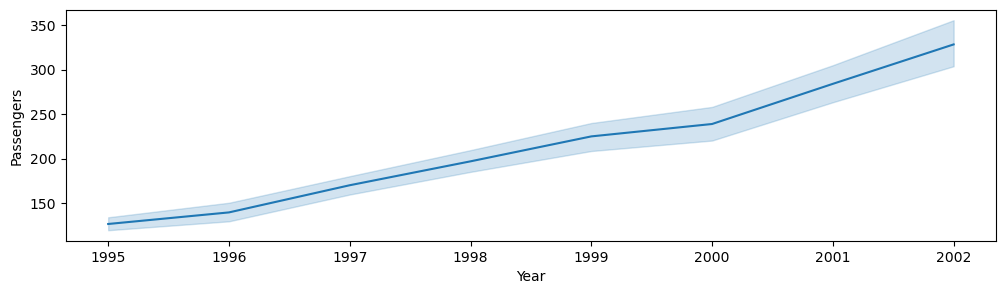

In [14]:
#LinePlot

plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=df1)

<Axes: xlabel='Months', ylabel='Passengers'>

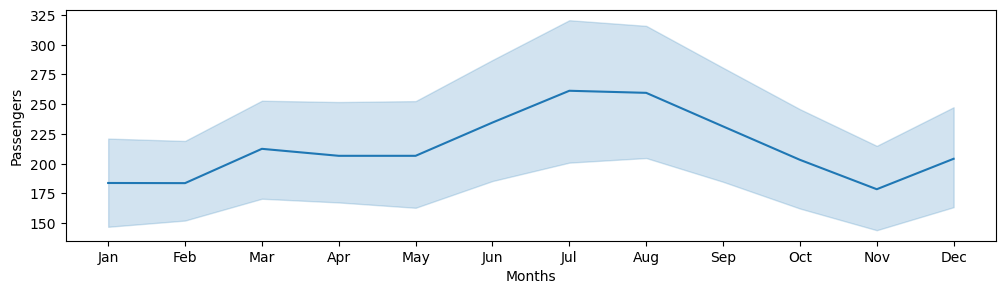

In [15]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Months",y="Passengers",data=df1)

In [16]:
df1.shape

(96, 16)

In [17]:
df1["t"] = np.arange(1,97)
df1["t_squared"] = df1["t"]*df1["t"]
df1["log_Passengers"] = np.log(df1["Passengers"])
df1.columns
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,1995,5,25,4.795791


In [18]:
#Splitting the data into Training and Testing

train = df1.head(84)
test = df1.tail(12)

In [19]:
#Linear Model

import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers ~ t',data = train).fit() 

#Prediction

pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t']))) 

rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2)) 
print("RMSE Linear : ", rmse_linear)

RMSE Linear :  53.19923653480264


In [20]:
#Exponential

Exp = smf.ols('log_Passengers ~ t',data = train).fit()                                       

pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))

rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential : ",rmse_Exp)

RMSE Exponential :  46.05736110315608


In [21]:
#Quadratic

Quad = smf.ols('Passengers ~ t+t_squared', data = train).fit()                                 

pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))

rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic : ",rmse_Quad)

RMSE Quadratic :  48.051888979331586


In [22]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()       

pred_add_sea = pd.Series(add_sea.predict(test))

rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive Seasonality : ",rmse_add_sea)

RMSE Additive Seasonality :  132.81978481421817


In [23]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data = train).fit()    

pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test))

rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic :",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic : 26.36081761209998


In [24]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()       
pred_Mult_sea = pd.Series(Mul_sea.predict(test))

rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality :",rmse_Mult_sea)

RMSE Multiplicative Seasonality : 140.0632020470863


In [25]:
# Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()    
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality :",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality : 10.519172544323471


In [26]:
#Dataframe

data = {"MODEL":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
'RMSE Value':pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
rmse = pd.DataFrame(data)
rmse

,MODEL,RMSE Value
0,RMSE_Linear,53.199237
1,RMSE_Exp,46.057361
2,RMSE_Quad,48.051889
3,RMSE_Add_Sea,132.819785
4,RMSE_Add_Sea_Quad,26.360818
5,RMSE_Mult_Sea,140.063202
6,RMSE_Mult_Add_Sea,10.519173


In [27]:
data1 = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-05-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data1, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-05-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [28]:
 # Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))                      
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["t"] = np.arange(1,13)
forecast1["t_squared"] = forecast1["t"]*forecast1["t"]
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4  2003-05-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [29]:
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6,36
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,7,49
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8,64
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,9,81
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,10,100


In [30]:
#Build the model on entire data set

model_full = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=df1).fit() 

In [31]:
#Prediction

pred_new = pd.Series(model_full.predict(forecast1))
pred_new

0     101.802790
1     100.717631
2     128.632471
3     121.797312
4     120.837153
5     147.876993
6     173.666834
7     170.956674
8     141.746515
9     112.661355
10     86.951196
11    111.616036
dtype: float64

In [32]:
forecast1["Forecasted_Passengers"] = pd.Series(pred_new)
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Forecasted_Passengers
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,101.802790
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,100.717631
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,128.632471
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,121.797312
4,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,120.837153
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6,36,147.876993
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,7,49,173.666834
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8,64,170.956674
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,9,81,141.746515
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,10,100,112.661355


In [33]:
#Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']]               
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,101.802790
1,2003-02-01,100.717631
2,2003-03-01,128.632471
3,2003-04-01,121.797312
4,2003-05-01,120.837153
5,2003-06-01,147.876993
6,2003-07-01,173.666834
7,2003-08-01,170.956674
8,2003-09-01,141.746515
9,2003-10-01,112.661355


# CocaCola Sales file

In [34]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [35]:
df.shape

(42, 2)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [37]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [38]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


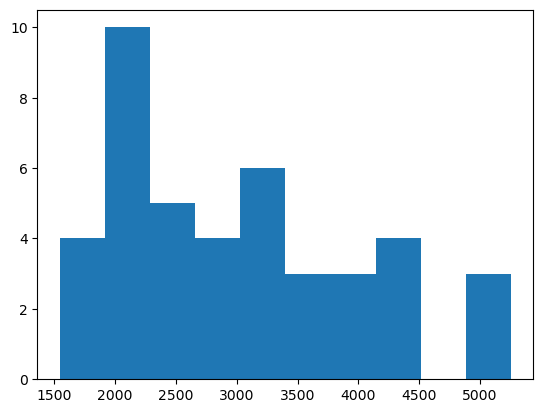

In [39]:
plt.hist(df['Sales'])
plt.show()

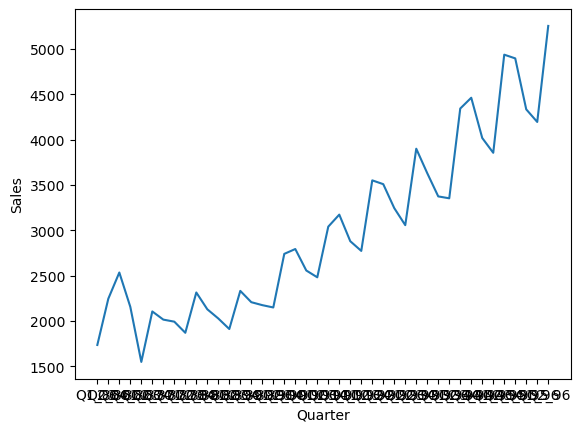

In [40]:
sns.lineplot(x="Quarter",y="Sales",data=df)
plt.show()

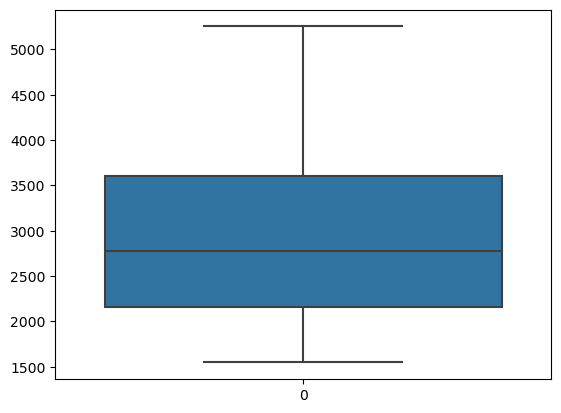

In [41]:
sns.boxplot(df['Sales'])
plt.show()

In [42]:
quarter =['Q1','Q2','Q3','Q4']

p = df["Quarter"][0]
p[0:2]
df['quarter']= 0

for i in range(42):
    p = df["Quarter"][i]
    df['quarter'][i]= p[0:2]

C:\Users\samad\AppData\Local\Temp\ipykernel_24884\3658627276.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]= p[0:2]


In [43]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [44]:
quarter_dummies = pd.DataFrame(pd.get_dummies(df['quarter']))
df1 = pd.concat([df,quarter_dummies],axis = 1)

In [45]:
df1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [46]:
df1["t"] = np.arange(1,43)
df1["t_squared"] = df1["t"]*df1["t"]
df1["log_Sales"] = np.log(df1["Sales"])

In [47]:
df1.head(3)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477


In [48]:
df1.shape

(42, 10)

In [49]:
#Train Test split

train = df1.head(32)
test = df1.tail(10)

In [50]:
#Linear Model

linear_model = smf.ols('Sales ~ t',data = train).fit() 

pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t']))) 

rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2)) 
print("RMSE Linear : ", rmse_linear)

RMSE Linear :  752.9233932767121


In [51]:
#Exponential

Exp = smf.ols('log_Sales ~ t',data = train).fit()                                       

pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))

rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential : ",rmse_Exp)

RMSE Exponential :  590.3316432076458


In [52]:
#Quadratic

Quad = smf.ols('Sales ~ t+t_squared', data = train).fit()                                 

pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))

rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
print("RMSE Quadratic : ",rmse_Quad)

RMSE Quadratic :  457.73573554073874


In [53]:
#Additive seasonality

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data = train).fit()              

pred_add_sea = pd.Series(add_sea.predict(test[['Q1', 'Q2', 'Q3', 'Q4']]))

rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  1850.4665461858358


In [54]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4', data = train).fit()       

pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1', 'Q2', 'Q3', 'Q4','t','t_squared']]))

rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 277.35107711285264


In [55]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()          

pred_Mult_sea = pd.Series(Mul_sea.predict(test))

rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 1908.250394836117


In [56]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()    

pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))

rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 448.86781826918093


In [57]:
data = {"MODEL":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),         #Testing
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}              
rmse = pd.DataFrame(data)
rmse

,MODEL,RMSE_Values
0,RMSE_Linear,752.923393
1,RMSE_Exp,590.331643
2,RMSE_Quad,457.735736
3,RMSE_Add_Sea,1850.466546
4,RMSE_Add_Sea_Quad,277.351077
5,RMSE_Mult_Sea,1908.250395
6,RMSE_Mult_Add_Sea,448.867818


In [58]:
data = [['Q3_97', 'Q3'], ['Q4_97', 'Q4'], ['Q1_98', 'Q1'],['Q2_98', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_97', 'Q3'], ['Q4_97', 'Q4'], ['Q1_98', 'Q1'], ['Q2_98', 'Q2']]


,Quarter,quarter
0,Q3_97,Q3
1,Q4_97,Q4
2,Q1_98,Q1
3,Q2_98,Q2


In [59]:
#Dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))         
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_97      Q3   0   0   1   0  1          1
1   Q4_97      Q4   0   0   0   1  2          4
2   Q1_98      Q1   1   0   0   0  3          9
3   Q2_98      Q2   0   1   0   0  4         16


In [60]:
forecast1

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_squared
0,Q3_97,Q3,0,0,1,0,1,1
1,Q4_97,Q4,0,0,0,1,2,4
2,Q1_98,Q1,1,0,0,0,3,9
3,Q2_98,Q2,0,1,0,0,4,16


In [61]:
#Build the model on entire data set

model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=df1).fit()   

In [62]:
#Prediction

pred_new = pd.Series(model_full.predict(forecast1))
pred_new

0    2180.858824
1    1851.383709
2    1635.419724
3    2284.261547
dtype: float64

In [63]:
forecast1["Forecasted_Sales"] = pd.Series(pred_new)

In [64]:
#Prediction for next 4 Quarters

Final_predict = forecast1.loc[:, ['Quarter', 'Forecasted_Sales']]          
Final_predict

,Quarter,Forecasted_Sales
0,Q3_97,2180.858824
1,Q4_97,1851.383709
2,Q1_98,1635.419724
3,Q2_98,2284.261547
